# Análise dos Dados do Airbnb - Barcelona 🏨

<center><img alt="Analisando Airbnb" width="20%" src = "https://logodownload.org/wp-content/uploads/2016/10/airbnb-logo-0-2048x2048.png"></center>

*Autor*: Igor Leonel
<br/>
<br/>
<br/>
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!
<br/>
<br/>
Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.
<br/>
<br/>
No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.
<br/>
<br/>
Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<br/>
<br/>
**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**
<br/>
<br/>
<br/>
<center><img alt="Bairro Gótico" width="60%" src="https://media.istockphoto.com/photos/panorama-of-gate-barri-gothic-quarter-barcelona-spain-picture-id512509596?k=20&m=512509596&s=612x612&w=0&h=2MauBnCWnmJEvvP-W7vVuppbHl-5MtKep5qu3fjEN3k="></center>

Este é o lugar onde **Barcelona** nasceu e onde sua história começou, então é ali que se **descobre a verdadeira alma desta cidade tão incrível da Catalunha**.
<br/>
<br/>
O Bairro Gótico, em **Barcelona**, é daqueles lugares cheio de vielas estreitas, prédios centenários e praças famosas, e que viram toda a história da cidade se desenrolar. **Uma área da cidade cheia de vida e de deliciosas descobertas, que faz a gente voltar no tempo**.

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte:

* `listings.csv` - Summary information and metrics for listings in Barcelona (good for visualisations).

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

%config InlineBackend.figure_format = 'svg'

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
DATA_PATH = 'http://data.insideairbnb.com/spain/catalonia/barcelona/2022-01-09/visualisations/listings.csv'
df = pd.read_csv(DATA_PATH, index_col='id')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna representa os bairros
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,70,1,23,2021-12-22,0.22,17,321,2,HUTB-002062
23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,53,2021-10-27,0.40,2,261,1,HUTB-005057
32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2020-02-22,0.49,3,7,0,HUTB-001722
34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,163,5,161,2021-12-20,1.17,2,161,12,HUTB-001506
35318,Luxury room with private bathroom and balcony,152070,Michel,Ciutat Vella,el Barri Gòtic,41.38170,2.17730,Private room,65,3,244,2022-01-06,1.89,1,54,2,NaN


Vamos agora analisar os tipos de cada variável do dataset:

In [4]:
# Analisando os tipo de variáveis
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Ao analisar os tipos percebe-se que a variável 'last_review' está com 'object', mas para tratamentos e análises é preferível transformar ela em data.

In [5]:
# Transformando a variável 'last_review' em data
df['last_review'] = pd.to_datetime(df.last_review)

In [7]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

# visualizando os tipos de variáveis
display(df.dtypes)

Entradas: 15704
Variáveis: 17


name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / len(df)*100).sort_values(ascending=False)

license                           34.933775
last_review                       25.407539
reviews_per_month                 25.407539
name                               0.063678
host_name                          0.019103
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
host_id                            0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
neighbourhood_group                0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

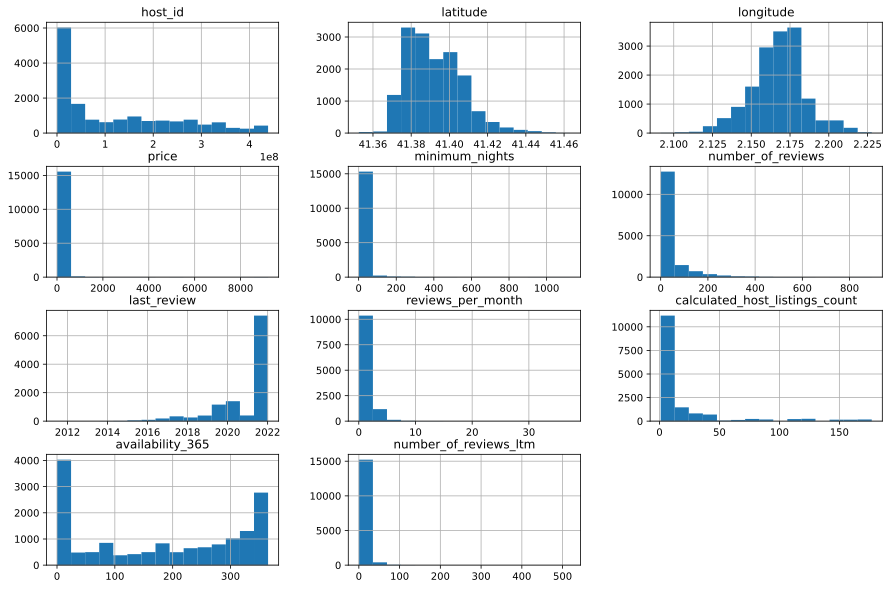

In [14]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [16]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15704.000000,15704.000000,15704.000000,11714.000000,15704.000000,15704.000000
mean,105.505731,13.905120,36.285469,1.073877,18.548013,180.463640
std,311.374008,35.371786,70.061176,1.369551,35.506447,138.460107
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,0.000000,0.170000,1.000000,19.000000
50%,67.000000,3.000000,6.000000,0.620000,3.000000,193.000000
75%,109.000000,30.000000,38.000000,1.550000,17.000000,320.000000
max,9200.000000,1124.000000,894.000000,37.240000,177.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 109, porém seu valor máximo é 9200.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


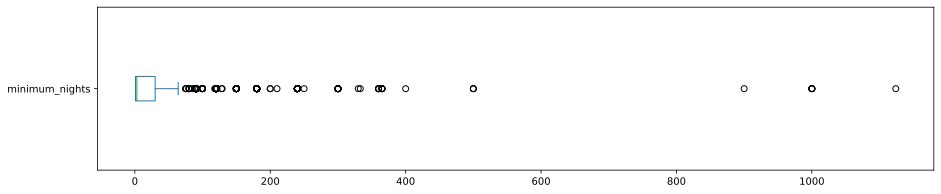

minimum_nights: valores acima de 30:
3463 entradas
22.0517%


In [18]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

#### Boxplot para price

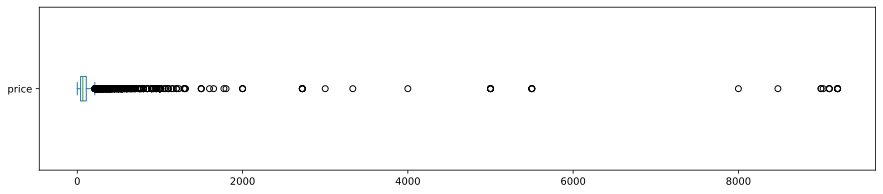


price: valores acima da 1500
37 entradas
0.2356%


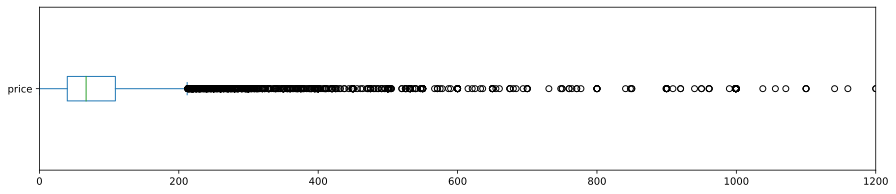

In [24]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3), )
plt.show()

# ver quantidade de valores acima de 1500 para price
print('\nprice: valores acima da 1500')
print('{} entradas'.format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# visualizar a variável price com box plot, mas com limite até 1200
df.price.plot(kind='box', vert=False, xlim=(0,1200), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

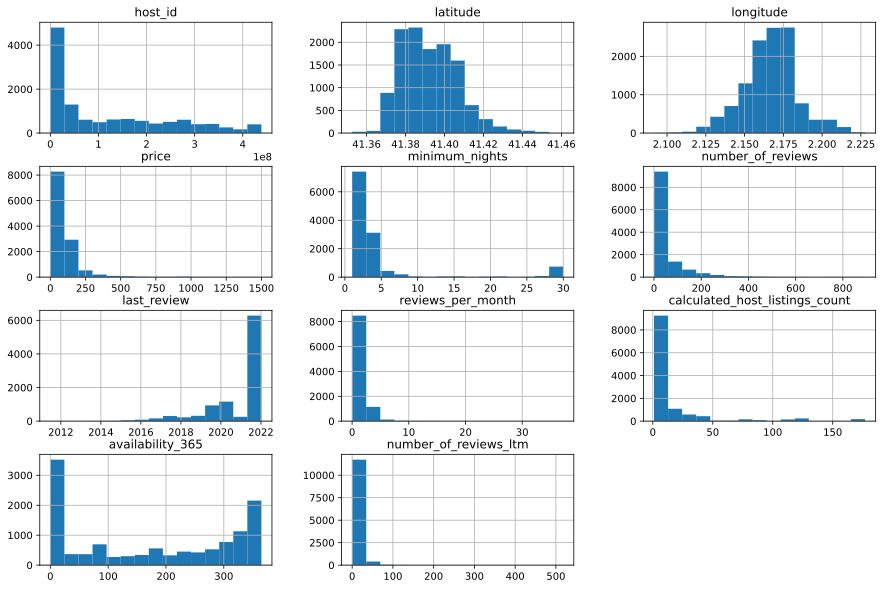

In [26]:
# remover os *outlires* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [29]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.035600,-0.025222,-0.065020,0.089444,0.184128
minimum_nights,-0.035600,1.000000,-0.108446,-0.139044,-0.069219,-0.040333
number_of_reviews,-0.025222,-0.108446,1.000000,0.595157,-0.076568,0.101362
reviews_per_month,-0.065020,-0.139044,0.595157,1.000000,-0.047023,0.142630
calculated_host_listings_count,0.089444,-0.069219,-0.076568,-0.047023,1.000000,0.269482
availability_365,0.184128,-0.040333,0.101362,0.142630,0.269482,1.000000


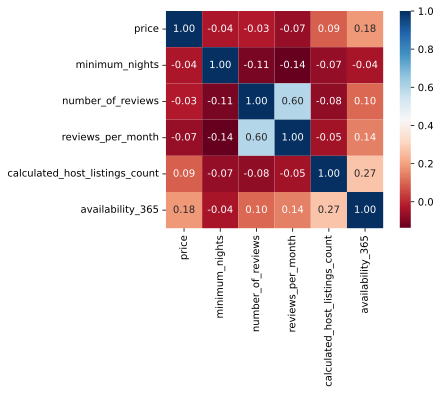

In [30]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [31]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6016
Private room       5811
Hotel room          211
Shared room         170
Name: room_type, dtype: int64

In [37]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts(normalize=True)*100

Entire home/apt    49.279161
Private room       47.599934
Hotel room          1.728375
Shared room         1.392529
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Barcelona?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhood_group*) a partir do preço de locação.

In [43]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Eixample               114.723184
Sarrià-Sant Gervasi    102.051919
Les Corts               98.490119
Gràcia                  97.375228
Sant Martí              96.105478
Ciutat Vella            88.021145
Sants-Montjuïc          78.400824
Sant Andreu             67.382716
Horta-Guinardó          65.483627
Nou Barris              50.112426
Name: price, dtype: float64

Acima, vemos que bairros como Eixample, Sarrià e Les Corts estão com média de preço superior a de lugares como Gràcia, Sant Martí e Ciutat Martí.

Uma pessoa que não pesquisa sobre Barcelona poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Nou Barris.

In [51]:
# ver quantidade de imóveis no Sant Martí
print(df_clean[df_clean.neighbourhood_group == 'Nou Barris'].shape)

# ver as 3 primeiras entradas de Sarrià
df_clean[df_clean.neighbourhood_group == "Nou Barris"][:3]

(169, 17)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
326464,Charm and quiet room,1669001,Isidro,Nou Barris,Can Peguera,41.43552,2.16423,Private room,60,1,33,2019-12-28,0.37,1,365,0,NaN
675174,SE ALQUILA HABITACION AMUEBLADA,3429484,Daniela,Nou Barris,la Prosperitat,41.44603,2.18172,Private room,30,8,0,NaT,NaN,3,362,0,NaN
688295,Nice and calm room,3109259,Milian,Nou Barris,el Turó de la Peira,41.43212,2.17242,Private room,50,1,37,2020-02-23,0.69,1,0,0,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

In [52]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [64]:
# ver a média da coluna `minimum_nights`` por bairros
noites = pd.DataFrame(df_clean.groupby("neighbourhood_group").minimum_nights.mean().sort_values(ascending=False)).reset_index()
noites.rename({'neighbourhood_group': 'Bairros', 'minimum_nights': 'Noites'}, axis=1, inplace=True)
noites.Noites = noites.Noites.astype(int)
noites

,Bairros,Noites
0,Sarrià-Sant Gervasi,6
1,Nou Barris,5
2,Sant Andreu,5
3,Horta-Guinardó,5
4,Les Corts,5
5,Sant Martí,4
6,Ciutat Vella,4
7,Sants-Montjuïc,4
8,Gràcia,3
9,Eixample,3


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.